# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd

df = pd.read_csv('Wholesale_data.csv')
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [3]:
# drop outliers
def remove_outliers_iqr(df, columns):
    """
    Remove outliers from a DataFrame using the IQR method.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of column names to check for outliers.

    Returns:
    pd.DataFrame: DataFrame with outliers removed.
    """
    # Copy the DataFrame to avoid modifying the original data
    df_clean = df.copy()

    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out the outliers
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

    return df_clean

In [4]:
df.drop(columns=['Channel', 'Region'], inplace=True)


In [5]:
df = remove_outliers_iqr(df, ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])

/var/folders/n9/j0dtm7bn7_56lrscncyljw6m0000gn/T/ipykernel_4148/2162212593.py:21: UserWarning: When passing multiple axes, layout keyword is ignored.
  df.plot(kind='box', subplots=True, layout=(3, 3), ax=axes[:num_features], title='Box Plots')


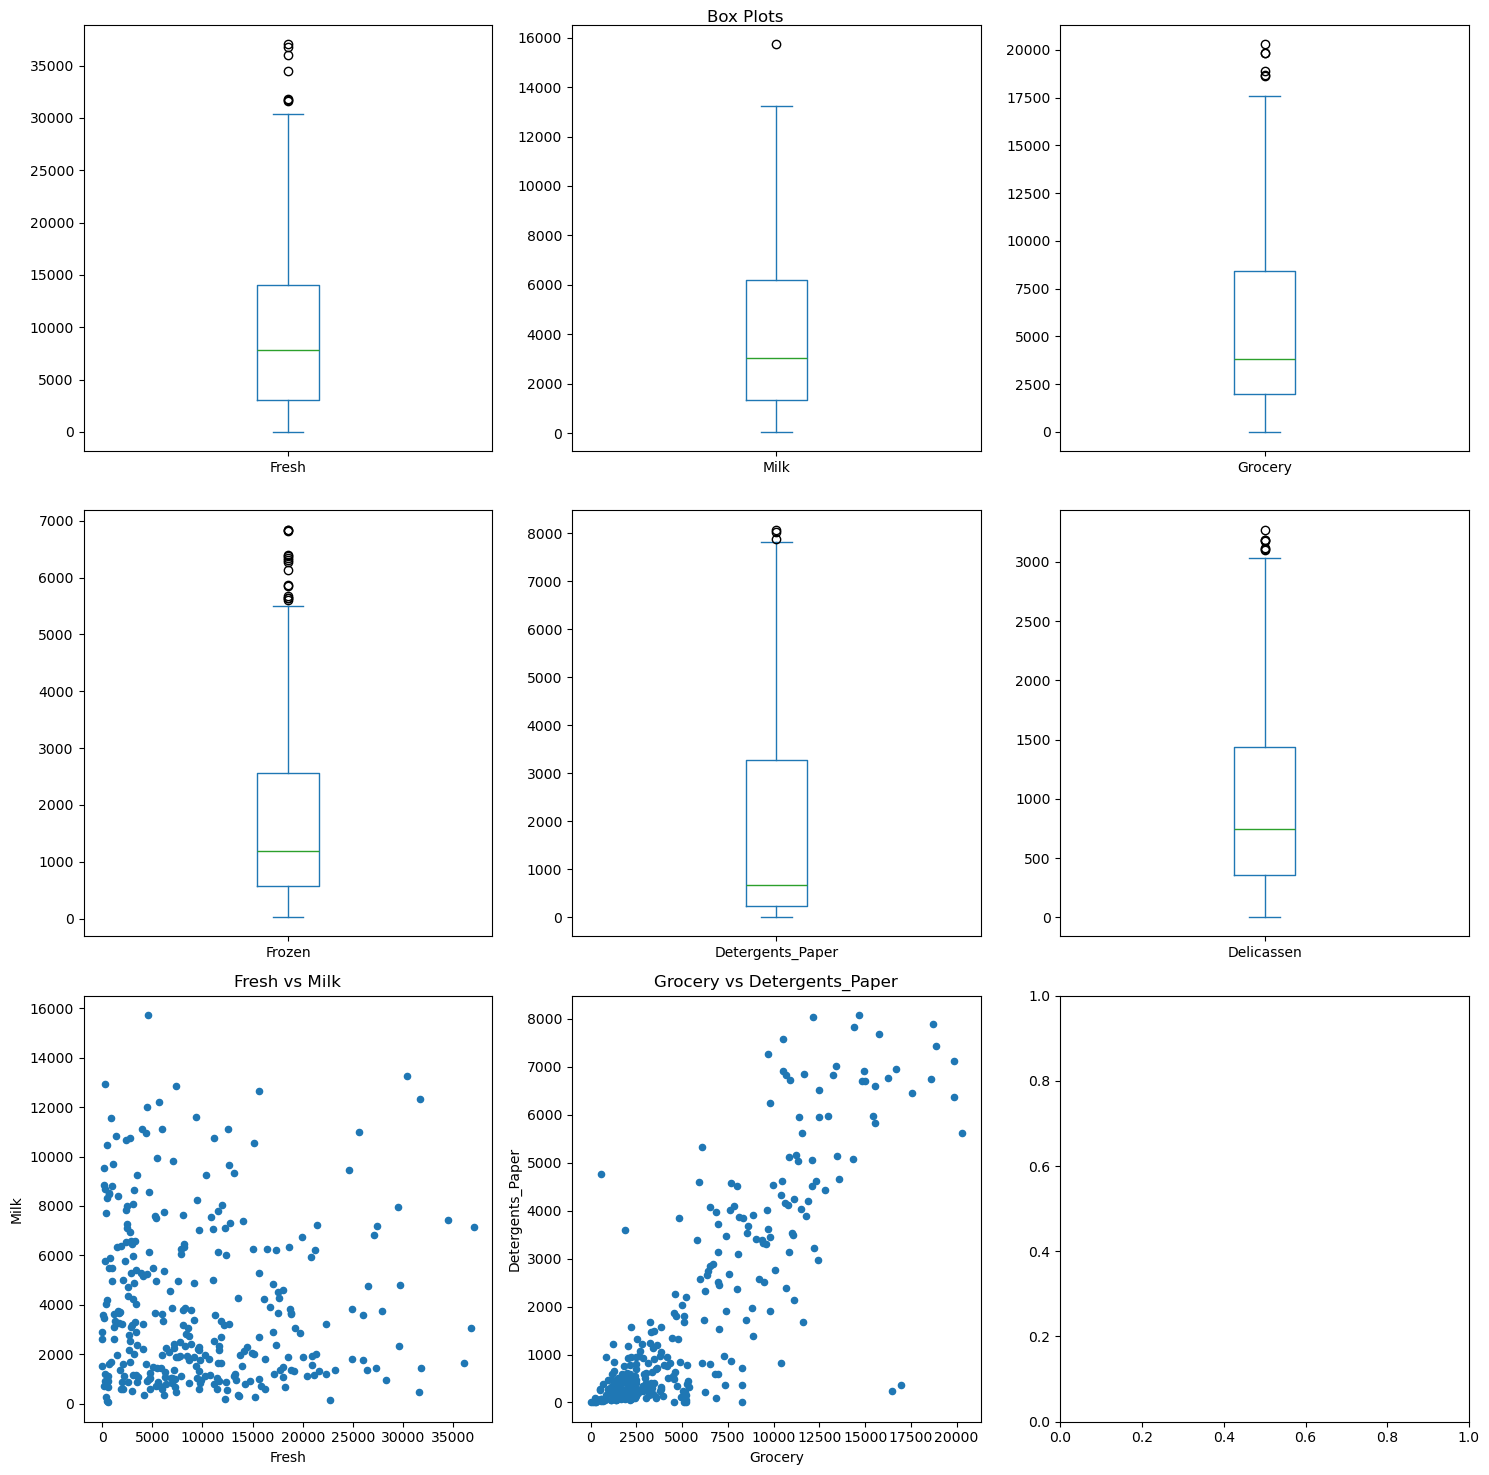

In [6]:
# viz 
import matplotlib.pyplot as plt
import seaborn as sns


# Generate descriptive statistics
df.describe()

# Calculate and display the correlation matrix
correlation_matrix = df.corr()

# Plotting
num_features = len(df.columns)
total_plots = num_features + 2  # Adding 2 for the scatter plots
fig, axes = plt.subplots(nrows=(total_plots // 3) + 1, ncols=3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Box plot for each feature
df.plot(kind='box', subplots=True, layout=(3, 3), ax=axes[:num_features], title='Box Plots')

# Scatter plots
df.plot(kind='scatter', x='Fresh', y='Milk', ax=axes[num_features], title='Fresh vs Milk')
df.plot(kind='scatter', x='Grocery', y='Detergents_Paper', ax=axes[num_features + 1], title='Grocery vs Detergents_Paper')

plt.tight_layout()
plt.show()

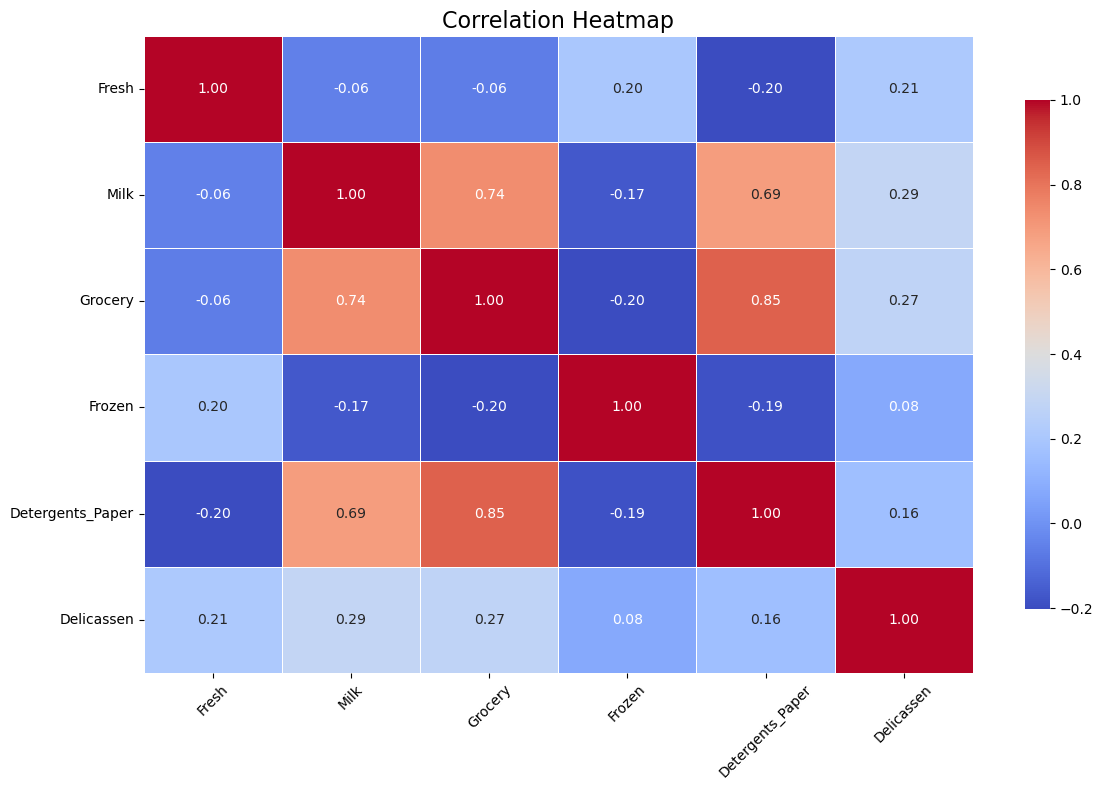

In [7]:
# Plotting the heatmap
plt.figure(figsize=(12, 8))  # Adjusted figure size for better aspect ratio
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=16)  # Added title for clarity
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()       # Adjust layout to prevent clipping
plt.show()

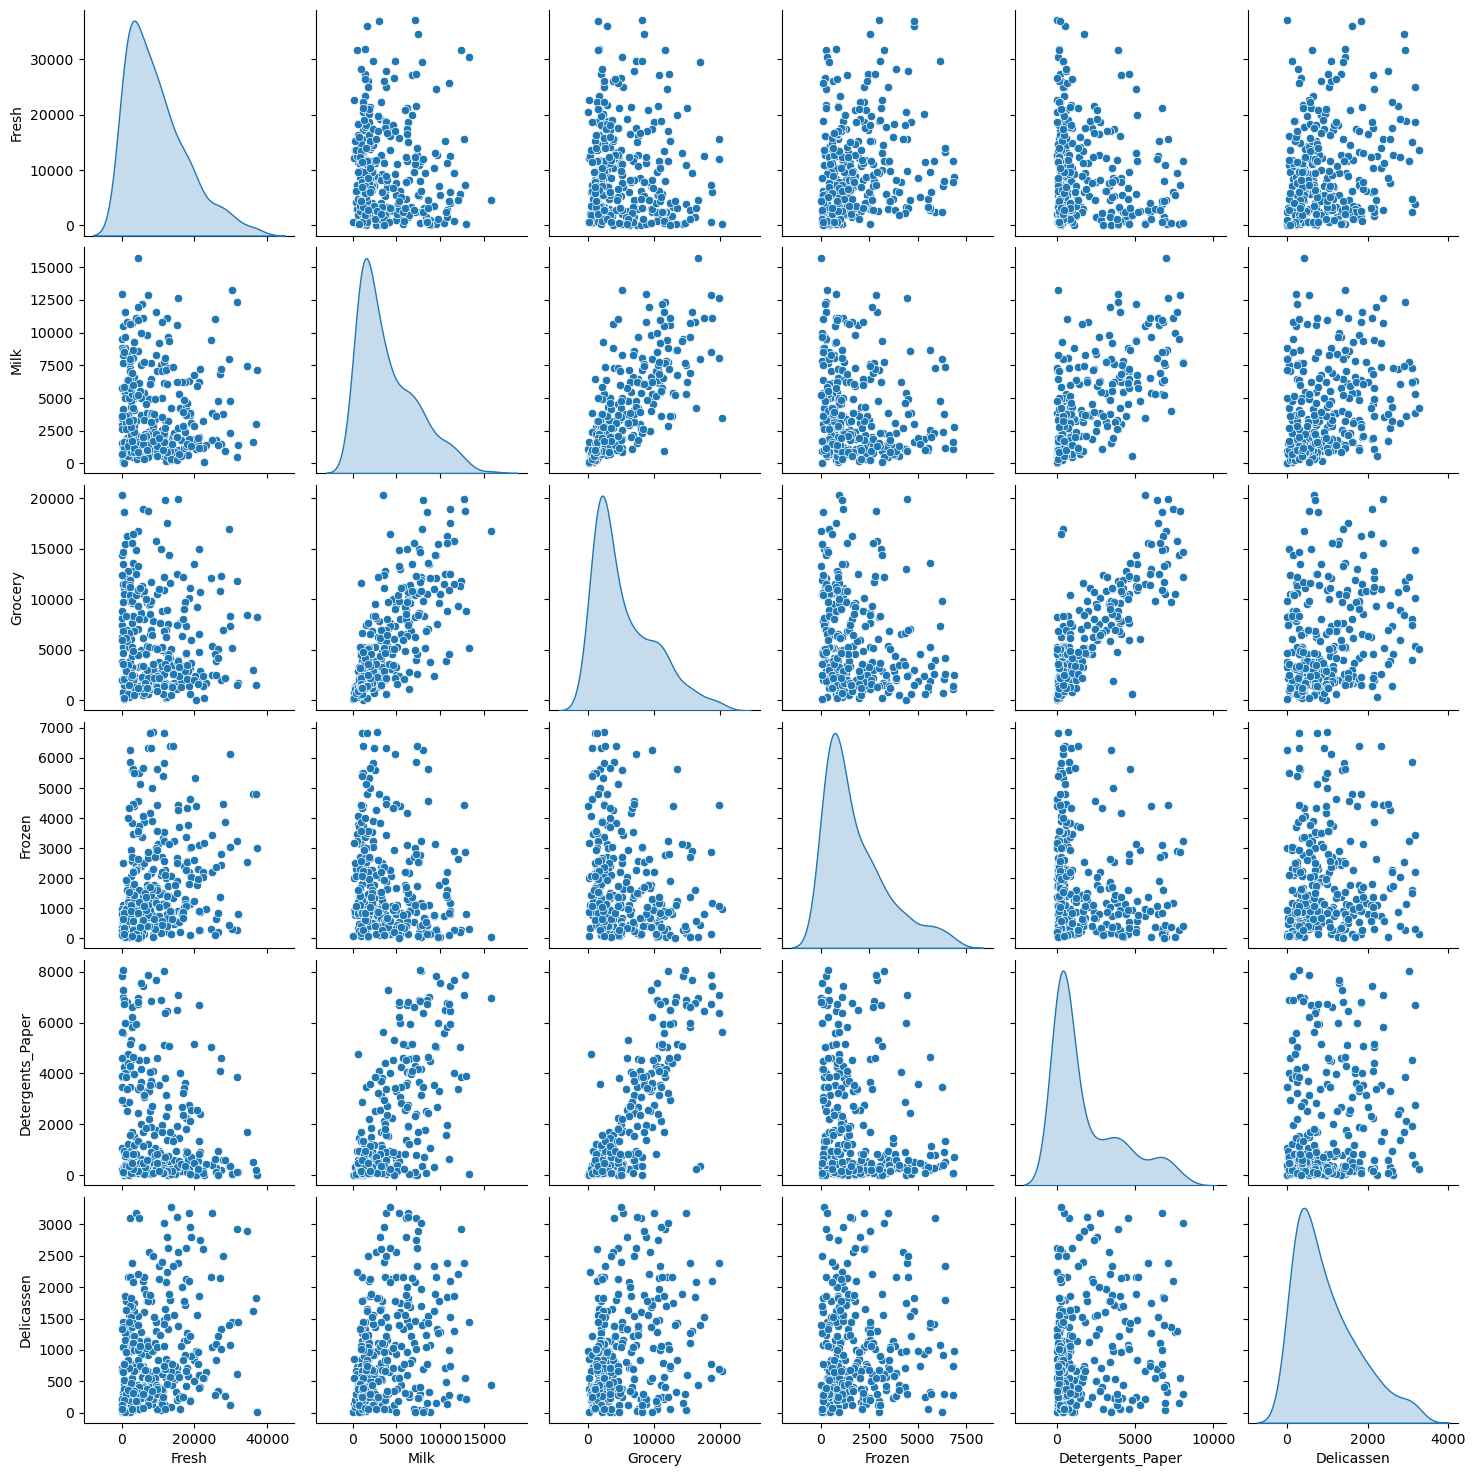

In [8]:
sns.pairplot(df, kind='scatter', diag_kind='kde')
plt.show()

In [9]:
# Standardize the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [24]:
from sklearn.cluster import KMeans
result_kmeans = []
result_dic = {}
for i in range(2,10):   
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    result_kmeans.append(kmeans.inertia_)
    result_dic[i] = kmeans.inertia_
print(result_dic)


{2: 1275.6298673363635, 3: 1055.1999161557248, 4: 899.2157274817704, 5: 824.3555021764828, 6: 733.8389157457307, 7: 706.480806645766, 8: 631.0655408672935, 9: 602.075006578793}


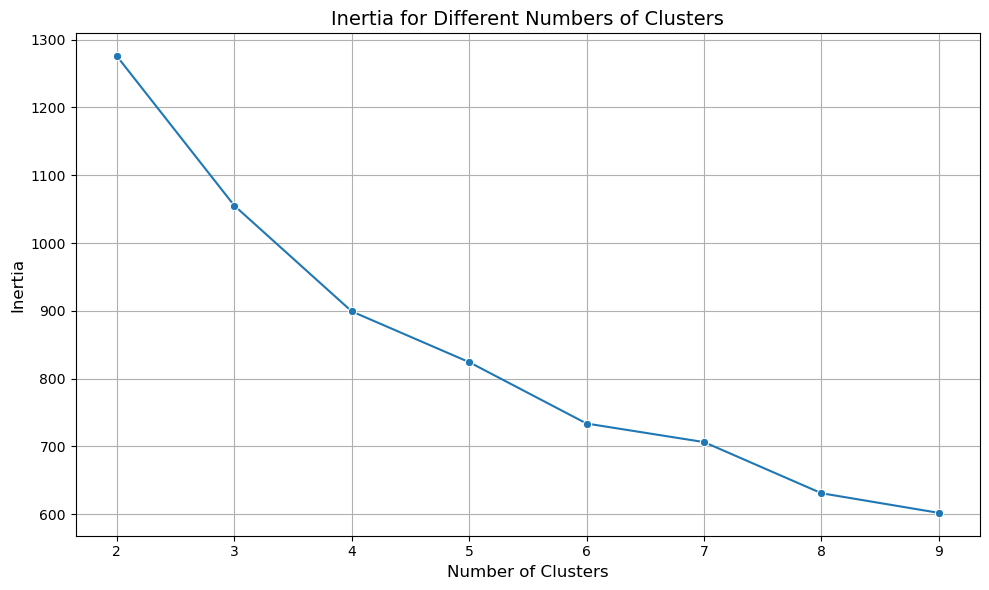

In [25]:
# Plotting the KMeans inertia line plot
# Plotting the inertia values
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(result_dic.keys()), y=list(result_dic.values()), marker='o')
plt.title('Inertia for Different Numbers of Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(list(result_dic.keys()))
plt.grid(True)
plt.tight_layout()
plt.show()


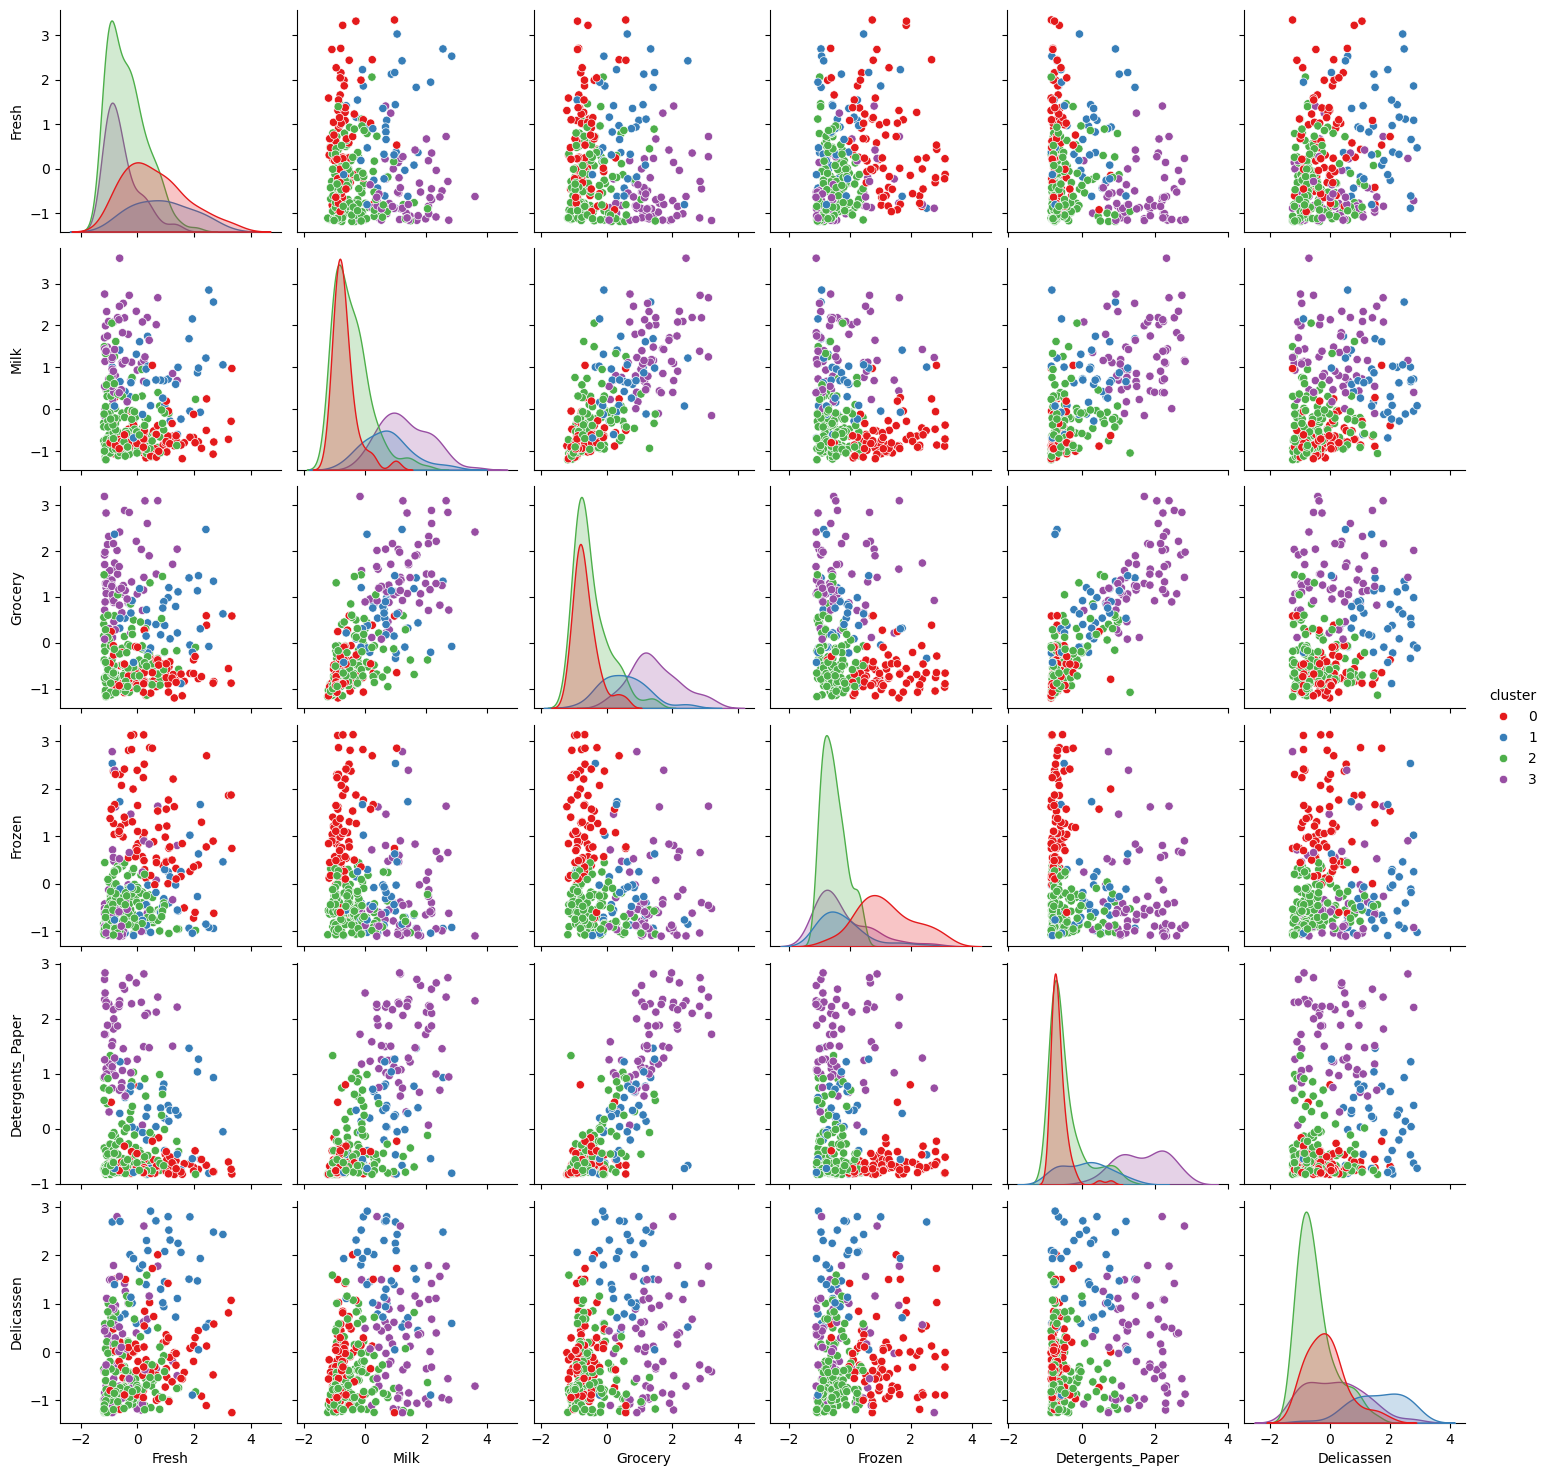

In [26]:
# 4 clusters is the best
# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)
df_scaled['cluster'] = kmeans.labels_

sns.pairplot(df_scaled, hue='cluster', palette='Set1')
plt.show()


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [21]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
result_agg = []
result_dic = {}
for i in range(2, 10):
    agg = AgglomerativeClustering(n_clusters=i)
    labels = agg.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    result_agg.append(score)
    result_dic[i] = score
print(result_dic)

{2: 0.45175721789713125, 3: 0.361757652025958, 4: 0.3980273593056607, 5: 0.392563981607792, 6: 0.40521226231328583, 7: 0.38806121185364606, 8: 0.39481281341268404, 9: 0.3146724151682237}


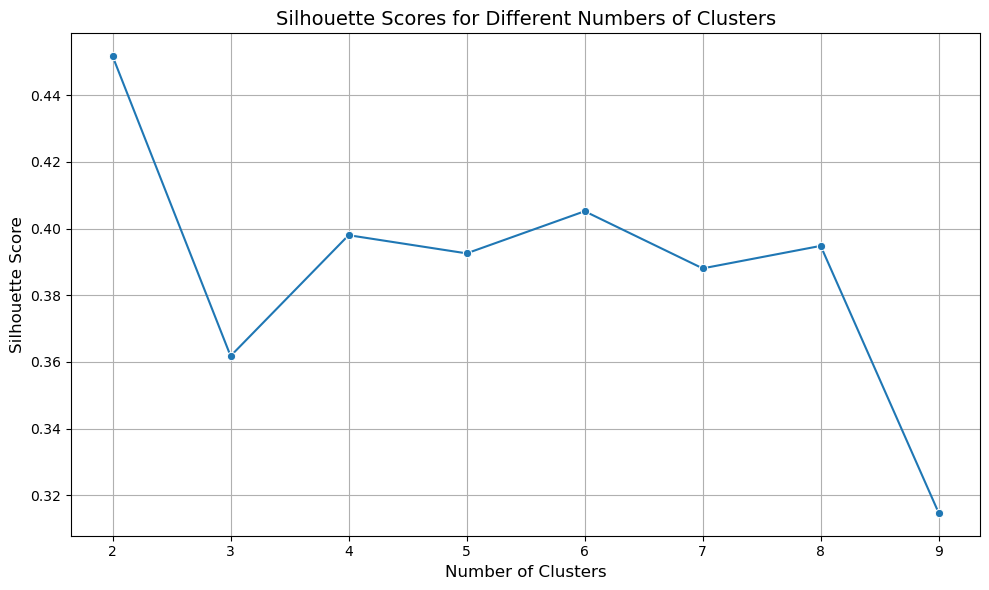

In [22]:
# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(result_dic.keys()), y=list(result_dic.values()), marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(list(result_dic.keys()))
plt.grid(True)
plt.tight_layout()
plt.show()

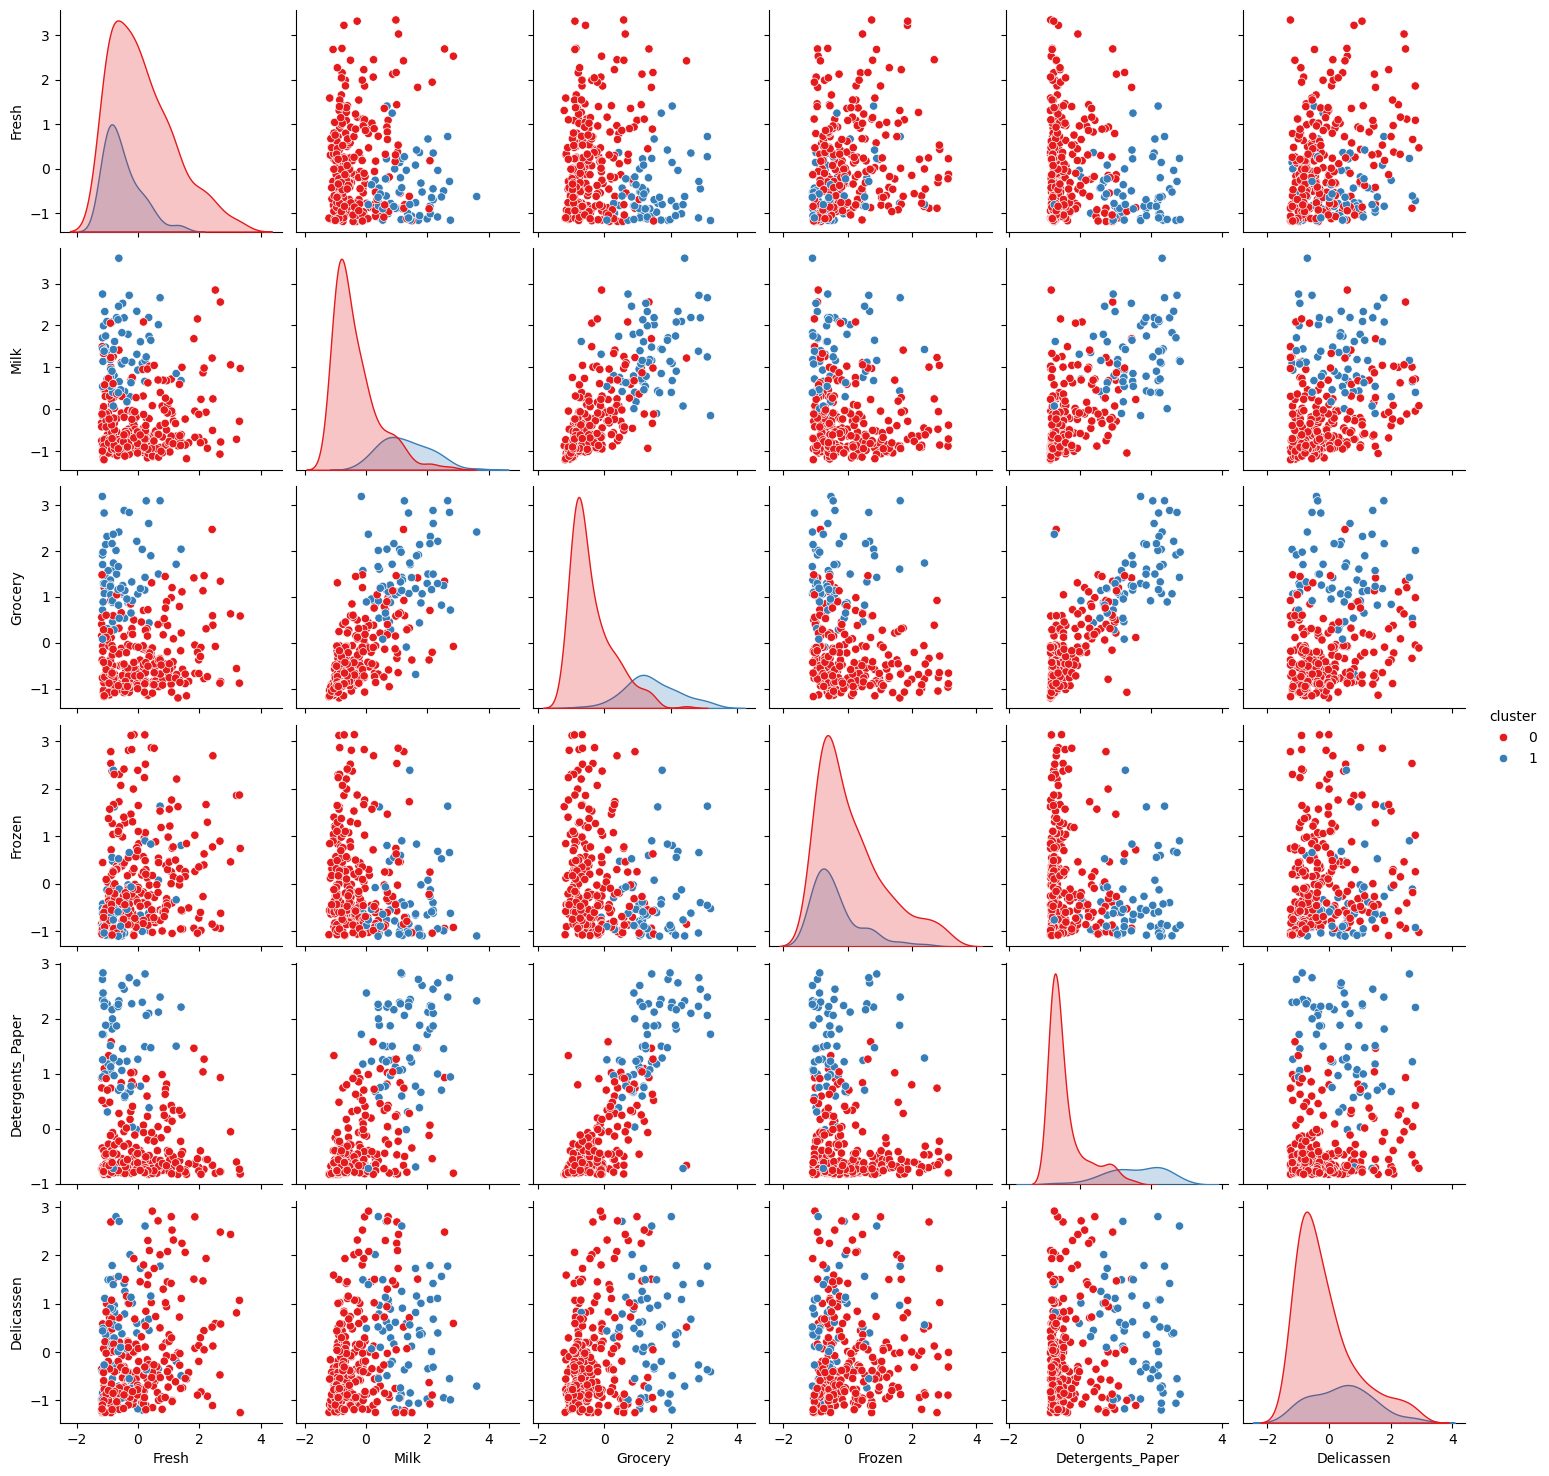

In [23]:
# 8 clusters is the best
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(df_scaled)
df_scaled['cluster'] = agg.labels_

sns.pairplot(df_scaled, hue='cluster', palette='Set1')
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [16]:
from sklearn.decomposition import PCA
# Perform PCA
for i in range(2, num_features + 1):  # Ensure n_components is within the valid range
    pca = PCA(n_components=i)
    pca.fit(df_scaled)
    print(f"Explained variance ratio for {i} components: {pca.explained_variance_ratio_}")


Explained variance ratio for 2 components: [0.61727922 0.13179599]
Explained variance ratio for 3 components: [0.61727922 0.13179599 0.11777394]
Explained variance ratio for 4 components: [0.61727922 0.13179599 0.11777394 0.06266411]
Explained variance ratio for 5 components: [0.61727922 0.13179599 0.11777394 0.06266411 0.0323706 ]
Explained variance ratio for 6 components: [0.61727922 0.13179599 0.11777394 0.06266411 0.0323706  0.02578719]


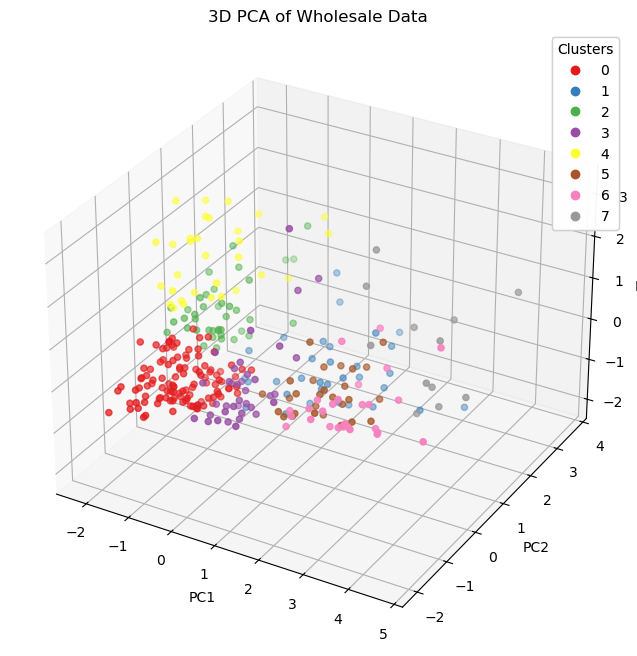

In [20]:
# Assuming df_scaled is a DataFrame with the 'cluster' column
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled.drop(columns='cluster'))  # Exclude 'cluster' during PCA transformation

# Convert the PCA result to a DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])

# Add the 'cluster' column to the PCA DataFrame
df_pca['cluster'] = df_scaled['cluster']

# Plotting the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['cluster'], cmap='Set1', marker='o')

# Adding labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA of Wholesale Data')

# Adding a legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. Milk,Grocery and Detergents_Paper are highly correlated, and they are the most important features for clustering.
2. The clusters formed by KMeans and Hierarchical Clustering are quite different, which indicates that the data points are not very similar to each other.
3. The box plots of the dataset's features revealed significant variability, with some features exhibiting outliers. This variability suggests diverse customer purchasing patterns, which could be further explored to tailor marketing strategies or inventory management.
4. Compare the kmeans and hierarchical clustering in this project, hierarchical clustering performs better than kmeans.